In [1]:
'''
In this notebook, I'm going to attempt to predict what type a Pokémon is using its stats,
physical attributes, and stage catergorization detailed in the other notebooks.

References

https://www.kaggle.com/vimary/tsne-vs-pca

https://www.kaggle.com/residentmario/classifying-pokemon-type-by-stat-allocation

https://www.kaggle.com/yassinealouini/pokemons-machine-learning-101

'''

"\nIn this notebook, I'm going to attempt to predict what type a Pokémon is using its stats,\nphysical attributes, and stage catergorization detailed in the other notebooks.\n\n"

In [2]:
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt

pok = pd.read_csv('pokemon.csv')

pok

Populating the interactive namespace from numpy and matplotlib


,#,Name,Stage,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Heights (m),Weight (kg),Generation
0,1.0,Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,0.7,6.9,1
1,2.0,Ivysaur,1,Grass,Poison,405,60,62,63,80,80,60,1.0,13.0,1
2,3.0,Venusaur,2,Grass,Poison,525,80,82,83,100,100,80,2.0,100.0,1
3,4.0,Charmander,1,Fire,NaN,309,39,52,43,60,50,65,0.6,8.5,1
4,5.0,Charmeleon,1,Fire,NaN,405,58,64,58,80,65,80,1.1,19.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,NaN,Glastrier,3,Ice,NaN,580,100,145,130,65,110,30,2.2,800.0,8
980,NaN,Spectrier,3,Ghost,NaN,580,100,65,60,145,80,130,2.0,44.5,8
981,NaN,Calyrex,4,Psychic,Grass,500,100,80,80,80,80,80,1.1,7.7,8
982,NaN,Calyrex,3,Psychic,Ice,680,100,165,150,85,130,50,2.4,809.1,8


Text(0.5, 0, "Pokemons' Type 1")

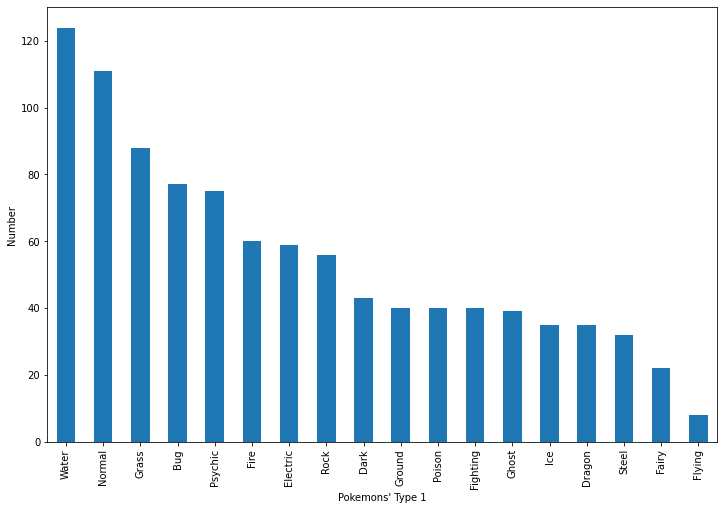

In [3]:
'''
This graph shows how many Pokémon have each type as their primary type. Water, Normal, and Grass are the leads in 
primary types.
'''
target_s = pok['Type 1']
"There are {} unique primary types".format(target_s.nunique())
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
target_s.value_counts().plot(kind='bar', ax=ax)
ax.set_ylabel('Number')
ax.set_xlabel("Pokemons' Type 1")

Text(0.5, 0, "Pokemons' Type 1")

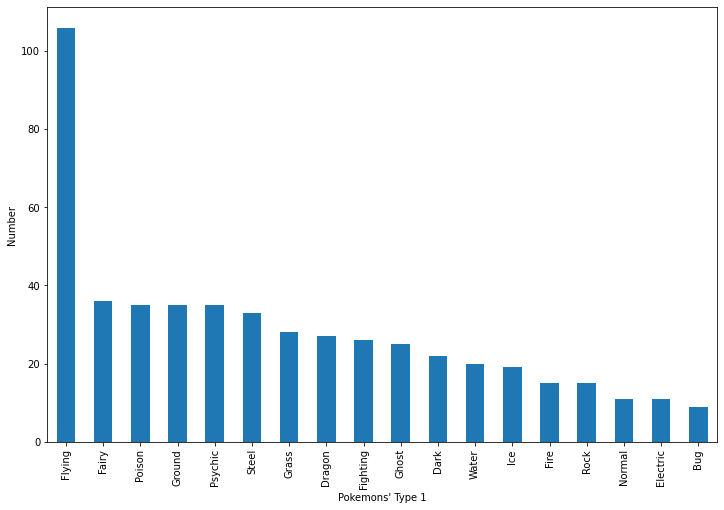

In [4]:
'''
This graph shows how many Pokémon have each type as their secondary type. In a change of pace, flying is the most
common secondary typing.
'''
target_s = pok['Type 2']
"There are {} unique secondary types".format(target_s.nunique())
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
target_s.value_counts().plot(kind='bar', ax=ax)
ax.set_ylabel('Number')
ax.set_xlabel("Pokemons' Type 1")

In [5]:
'''
I decided to eschew about secondary typing for simplicity’s sake. Here, I'm assigning types numerical values
and calling the column this creates Type1Id.
'''

pok['Type1Id'] = pok['Type 1'].rank(method='dense').astype(int)
pok.head()

,#,Name,Stage,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Heights (m),Weight (kg),Generation,Type1Id
0,1.0,Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,0.7,6.9,1,10
1,2.0,Ivysaur,1,Grass,Poison,405,60,62,63,80,80,60,1.0,13.0,1,10
2,3.0,Venusaur,2,Grass,Poison,525,80,82,83,100,100,80,2.0,100.0,1,10
3,4.0,Charmander,1,Fire,NaN,309,39,52,43,60,50,65,0.6,8.5,1,7
4,5.0,Charmeleon,1,Fire,NaN,405,58,64,58,80,65,80,1.1,19.0,1,7


In [6]:
'''
I decided to reference a method I found from this article: https://www.kaggle.com/vimary/tsne-vs-pca. The method they 
use is called TSNE, which stands for t-distributed Stochastic Neighbor Embedding. It's used to visualize high
dimensional data by converting similarities between data points to joint probabilities. To start, I placed all the
features other than Type1 into an array and the Type1ID into a separate array so I can plot it.
'''
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Heights (m)', 
            'Weight (kg)','Stage']
targets  = ['Type1Id']

In [7]:
'''
I'm standardizing the data here. This is necessary since not fully evolved Pokémon typically have much lower stats
than other types of Pokémon, and this can polarize the data significantly. With standardization, this problem won't be
significant.
'''
pok_norm = pok.copy()
pok_norm[features] = StandardScaler().fit(pok[features]).transform(pok[features])

In [8]:
'''
Here, I set the parameters for the TSNE learning. N-components represents the dimensionality of the embedded space
and learning rate determines how fast the algorithm learns from the data. The method fit transform is makes the 
features listed above fit into an embedded space and then returns the transformed output.
'''

X_tsne = TSNE(learning_rate=500, n_components=2).fit_transform(pok_norm[features])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

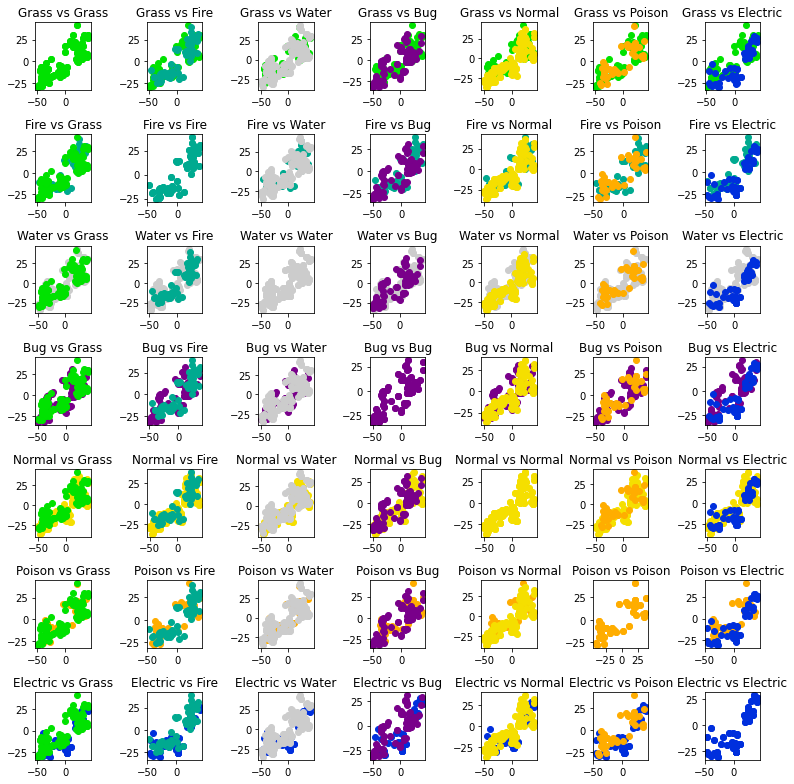

In [13]:
'''
I apologize about all the c* argument errors but I was unsure about how to fix it. If you scroll to the bottom,
however, you'll see the graphs. 

Here, I'm graphing many different results from the TSNE comparisons. These graphs take Pokémon from one type and
compare them to another random type.

As you can see, there are plenty of typings that are compared to each other, but 
there seems to be no correlation between any of them. All of the data points are clustered in the same areas, and
few, if any, types seem to show any sign of clustering or seperation. This goes to show that it takes Pokémon typing
is not a significant enough classifier to be able to separate Pokémon based off of it.
'''

fig = figure(figsize=(11, 11))

cmap = plt.get_cmap('nipy_spectral')
types1 = pok['Type 1'].unique()
type1_ids = pok['Type1Id'].unique()
num_types1 = len(types1)

rows, cols = 7, 7
num = 1
for row, t1_id, t1 in zip(range(rows), type1_ids, types1):
    for col, t2_id, t2 in zip(range(cols), type1_ids, types1):
        subplot(rows,cols,num)
        X_i = X_tsne[np.where(pok['Type1Id'] == t1_id)[0]]
        X_j = X_tsne[np.where(pok['Type1Id'] == t2_id)[0]]
        scatter(X_i[:, 0], X_i[:, 1], c=cmap(t1_id / num_types1))
        scatter(X_j[:, 0], X_j[:, 1], c=cmap(t2_id / num_types1))
        title(str(t1) + ' vs ' + str(t2))
        num += 1
fig.tight_layout()